# Final Project - Federal Disaster

# Data source and brief description

This report would use the data of the disasters and emergencies in the USA from 1953 to 2017. However, for the secific purposes of this report, not all data would be used. The data was published by the Federal Emergency Management Agency and collected by the National Emergency Management Information System

Direct link: https://www.kaggle.com/datasets/fema/federal-disasters/data

The table below would show each attribute in the dataset with their following number of observations and a briefly describe them

| Attribute name                  | Description                                                                                                   |
|:--------------------------------|:--------------------------------------------------------------------------------------------------------------|
| Declaration Number              | Unique identifier assigned to the disaster declaration                                                         |
| Declaration Type                | The declared type of the catastrophe (e.g., Disaster)                                                              |
| Declaration Day                 |  The declared time in date of the disaster                                                                     |
| State                           | The state where the disaster occurred                                                                          |
| County                          | The county within the state where the disaster occurred                                                        |
| Disaster Type                   | The particular type of disaster (e.g., Tornado)                                                                          |
| Disaster Title                  | A title or name that given to the disaster                                                                          |
| Start Date                      | The date when the disaster event started                                                                       |
| End Date                        | The date when the disaster event ended                                                                         |
| Close Date                      | The formal closure date of the disaster declaration and associated response efforts                                                              |
| Individual Assistance Program   | Indicates whether the Individual Assistance Program was provided as part of the catastrophe response (Y/N)      |
| Individuals & Households Program| Indicates whether the Individuals & Households Program was provided as part of the catastrophe response (Y/N) |
| Public Assistance Program       | Indicates whether the Public Assistance Program was provided as part of the catastrophe response (Y/N)          |
| Hazard Mitigation Program       | Indicates whether the Hazard Mitigation Program was provided as part of the catastrophe response (Y/N)          |

# Purposes

- Provide visualisation of catastrophic events in the US and the relationship between different data
- Identify, explore and analyse notable trends of the topic and related information in the period of 1959 to 2014
- Discover the connections between related factors (time, states, types, etc.) and draw conclusions and predictions if possible

# Data Preparation

Import necessary libraries () and read in the dataset(csv file)

In [102]:
# Import the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")


# Read the two datasets
df = pd.read_csv('Federal Disasters.csv',on_bad_lines='skip')

# Display the first 5 rows of the dataset
df.head()

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
0,DR-1,Disaster,05-02-53,GA,NaN,Tornado,Tornado,05-02-53,05-02-53,06-01-54,Yes,No,Yes,Yes
1,DR-2,Disaster,05/15/1953,TX,NaN,Tornado,Tornado and Heavy Rainfall,05/15/1953,05/15/1953,01-01-58,Yes,No,Yes,Yes
2,DR-3,Disaster,05/29/1953,LA,NaN,Flood,Flood,05/29/1953,05/29/1953,02-01-60,Yes,No,Yes,Yes
3,DR-4,Disaster,06-02-53,MI,NaN,Tornado,Tornado,06-02-53,06-02-53,02-01-56,Yes,No,Yes,Yes
4,DR-5,Disaster,06-06-53,MT,NaN,Flood,Floods,06-06-53,06-06-53,12-01-55,Yes,No,Yes,Yes


As mentioned above, there are a large number of missing values. These ones would be excluded from the set to enable a valid and complete set of data. This can also considered a data filtering process. Besdies, the dataset would only take 50 main states of the United States, not the territories. Therefore, all of those would be dropped also.

In [120]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Drop any rows with missing values
df_cleaned = df.dropna()
territories = ['PR', 'GU', 'FM', 'VI', 'AS', 'PW', 'MP', 'MH']
num_territories_dropped = df_cleaned[df_cleaned['State'].isin(territories)].shape[0]
df_cleaned = df_cleaned[~df_cleaned['State'].isin(territories)]
print('Territories drops:                  ', num_territories_dropped)

# Drop then reset index column
df_cleaned.reset_index(drop=True, inplace=True)

# Count attributes before filtering
num_attributes_before = df.shape[0]  
print("\nNumber of attributes before filtering:", num_attributes_before)

# Count attributes after filtering
num_attributes_after = df_cleaned.shape[0]  # Number of rows after filtering
print("Number of attributes after filtering:", num_attributes_after)



Missing values:
Declaration Number                      0
Declaration Type                        0
Declaration Date                        0
State                                   0
County                                197
Disaster Type                           0
Disaster Title                          0
Start Date                              0
End Date                              342
Close Date                          10975
Individual Assistance Program           0
Individuals & Households Program        0
Public Assistance Program               0
Hazard Mitigation Program               0
dtype: int64
Territories drops:                   1047

Number of attributes before filtering: 46185
Number of attributes after filtering: 33629


Since the datetime data in the set('Declaration Date', 'Start Date', 'End Date') is not uniform, there is a need to get them in the same format, which would make it easier to convert and analyse them in the pandas library (datetime format). 

In [113]:
# Create a copy of the DataFrame to avoid overwriting data
df_cleaned = df_cleaned.copy()

# List potential date formats in data set
date_formats = {
    'Declaration Date': ['%m/%d/%Y', '%m-%d-%Y', '%d/%m/%Y', '%d-%m-%Y'],
    'Start Date': ['%m/%d/%Y', '%m-%d-%Y', '%d/%m/%Y', '%d-%m-%Y'],
    'End Date': ['%m/%d/%Y', '%m-%d-%Y', '%d/%m/%Y', '%d-%m-%Y'],
    'Close Date': ['%m/%d/%Y', '%m-%d-%Y', '%d/%m/%Y', '%d-%m-%Y']
}

# Replace "/" with "-" 
for col in date_formats.keys():
    df_cleaned.loc[:, col] = df_cleaned[col].str.replace("/", "-")

# Function converting years
def convert_year(year_str):
    year = int(year_str)
    if 53 <= year <= 99:
        return '19' + str(year)
    elif 00 <= year <= 17:
        return '20' + str(year)
    else:
        return year_str  # Unchanged if already in the right format

# Convert years to 4 digits
for col in date_formats.keys():
    df_cleaned[col] = df_cleaned[col].str.split('-').apply(lambda x: '-'.join([x[0], x[1], convert_year(x[2])]))

# Convert date columns to pandas datetime format 
for col, formats in date_formats.items():
    for fmt in formats:
        try:
            df_cleaned[col] = pd.to_datetime(df_cleaned[col], format=fmt)
            df_cleaned[col] = df_cleaned[col].dt.strftime('%m-%d-%Y')  # Format the date column
            break  # Break the loop if successful
        except ValueError:
            continue  # Continue to the next format if parsing fails
            
# Exclude "County" from county names
df_cleaned['County'] = df_cleaned['County'].str.split().str[0]

# Reset the index and drop the old index column
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.index += 1
 
# Display the cleaned dataset 
df_cleaned

,Declaration Number,Declaration Type,Declaration Date,State,County,Disaster Type,Disaster Title,Start Date,End Date,Close Date,Individual Assistance Program,Individuals & Households Program,Public Assistance Program,Hazard Mitigation Program
1,DR-91,Disaster,01-29-1959,IN,Clay,Flood,Flood,01-29-1959,01-29-1959,11-01-1960,Yes,No,Yes,Yes
2,DR-183,Disaster,12-24-1964,CA,Alpine,Flood,Heavy Rains and Flooding,12-24-1964,12-24-1964,04-05-1976,Yes,No,Yes,Yes
3,DR-183,Disaster,12-24-1964,CA,Amador,Flood,Heavy Rains and Flooding,12-24-1964,12-24-1964,04-05-1976,Yes,No,Yes,Yes
4,DR-183,Disaster,12-24-1964,CA,Butte,Flood,Heavy Rains and Flooding,12-24-1964,12-24-1964,04-05-1976,Yes,No,Yes,Yes
5,DR-183,Disaster,12-24-1964,CA,Colusa,Flood,Heavy Rains and Flooding,12-24-1964,12-24-1964,04-05-1976,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33625,EM-3369,Emergency,02-12-2014,SC,Williamsburg,Ice,Severe Winter Storm,02-10-2014,02-19-2014,05-07-2015,No,No,Yes,No
33626,EM-3369,Emergency,02-12-2014,SC,York,Ice,Severe Winter Storm,02-10-2014,02-19-2014,05-07-2015,No,No,Yes,No
33627,EM-3371,Emergency,07-23-2014,WA,Colville,Fire,Wildfires,07-09-2014,08-05-2014,04-22-2016,No,No,Yes,No
33628,EM-3371,Emergency,07-23-2014,WA,Chelan,Fire,Wildfires,07-09-2014,08-05-2014,04-22-2016,No,No,Yes,No


After cleaning, the final data set used has 470,806 attributes, 33629 rows and 14 columns.

# 1. Discovery Data Analysis

# 1.1 Numerical Analysis

After cleaning, the report would start by visualising the number of disasters overtime. This would give an overview about volume of the dataset

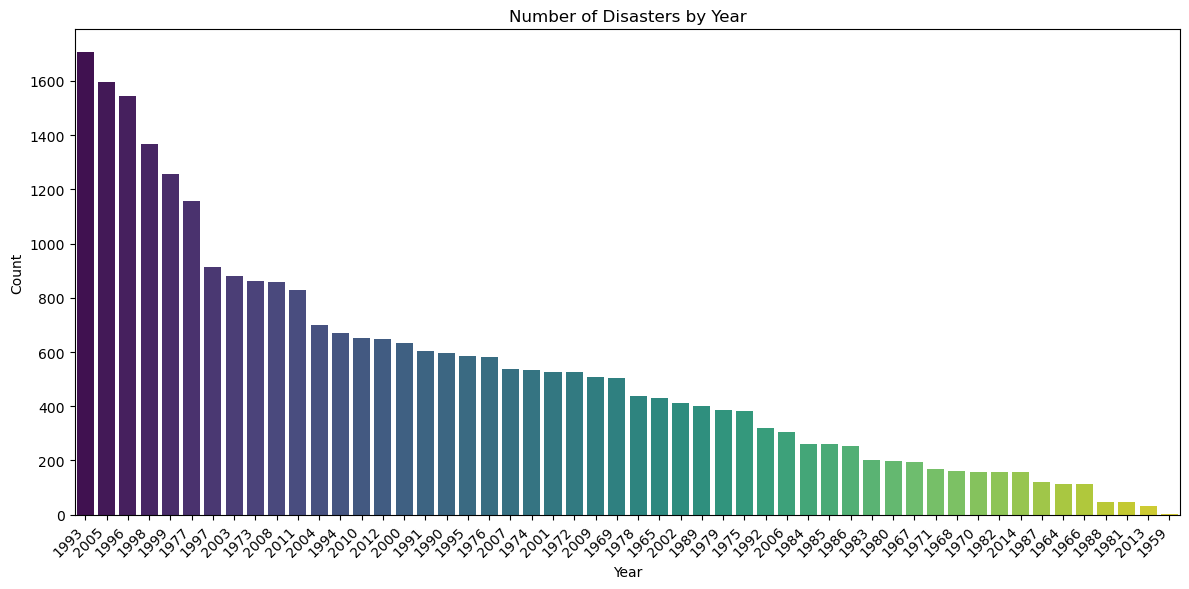

In [118]:
# Copy to avoid overwriting original dataset
bp_cp = df_cleaned.copy()

# Ensure 'Declaration Date' exists in datetime format
bp_cp['Declaration Date'] = pd.to_datetime(bp_cp['Declaration Date'], errors='coerce')
bp_cp['Year'] = bp_cp['Declaration Date'].dt.year

# Drop rows with non-finite values in 'Year' column
bp_cp = bp_cp.dropna(subset=['Year'])

# Convert 'Year' column to integers using recommended method
bp_cp['Year'] = bp_cp['Year'].astype(int)

# Count the number of disasters per year
disaster_counts_by_year = bp_cp['Year'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

# Create the bar plot, ensuring all years are included and ordered correctly
sns.countplot(data=bp_cp, x='Year', order=disaster_counts_by_year.index, palette='viridis')

plt.title('Number of Disasters by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('number_of_disasters_by_year.png')
plt.show()


However, it is better to have detailed value drawn from the set and also more information about the number of disasters overall. Hence, a histogram would be plotted to show the min, max, average and also mean value

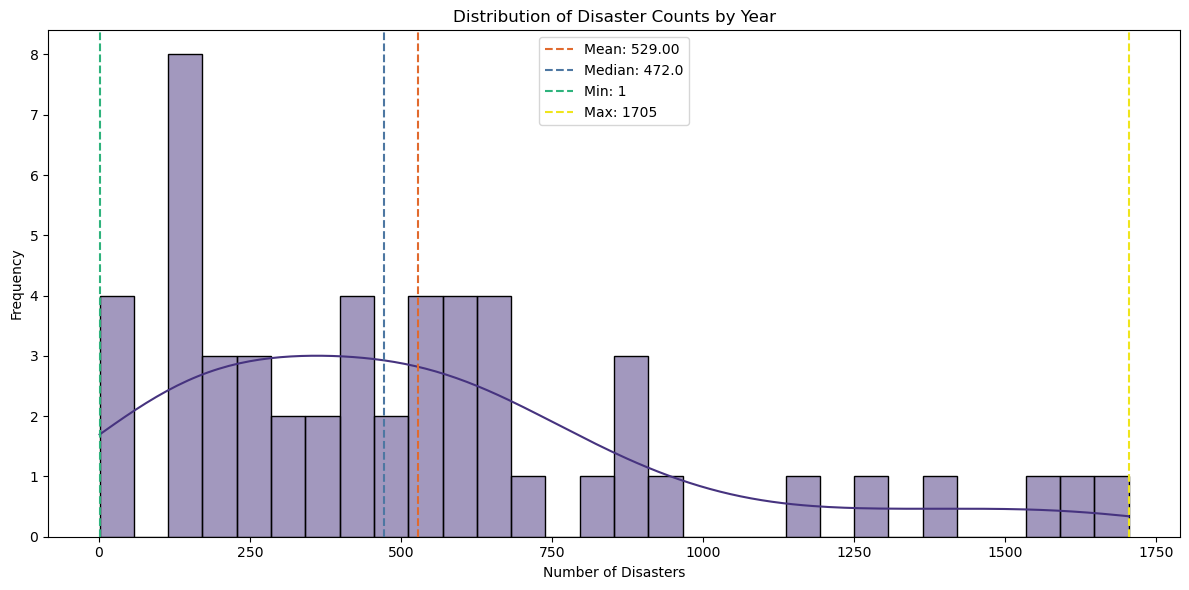

In [119]:
# Calculate min, max, mean and median
min_disasters = disaster_counts_by_year.min()
max_disasters = disaster_counts_by_year.max()
mean_disasters = disaster_counts_by_year.mean()
median_disasters = disaster_counts_by_year.median()

# Plot the histogram of disaster counts
plt.figure(figsize=(12, 6))
sns.histplot(disaster_counts_by_year.dropna(), bins=30, color='#46337f', kde=True)

# Add mean and median lines
plt.axvline(mean_disasters, color='#E16A2E', linestyle='--', label=f'Mean: {mean_disasters:.2f}')
plt.axvline(median_disasters, color='#4D77A2', linestyle='--', label=f'Median: {median_disasters}')

# Add min and max lines
plt.axvline(min_disasters, color='#2eb37c', linestyle='--', label=f'Min: {min_disasters}')
plt.axvline(max_disasters, color='#efe51c', linestyle='--', label=f'Max: {max_disasters}')

# Add plot details
plt.title('Distribution of Disaster Counts by Year')
plt.xlabel('Number of Disasters')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.savefig('distribution_of_disaster_counts_by_year.png')
plt.show()


As it shown from the map, even though having some outliers, the effects of those are not significant. Hence, it is possible to conclude that the average number of disasters each year is about 500.

Next, the trend of disasters cases over the years would be visualised by a line graph. The data clustered and count separately for each year. This helps to identify any possible patterns or changes over time.

# 1.2 Trend Analysis ( Time-series)

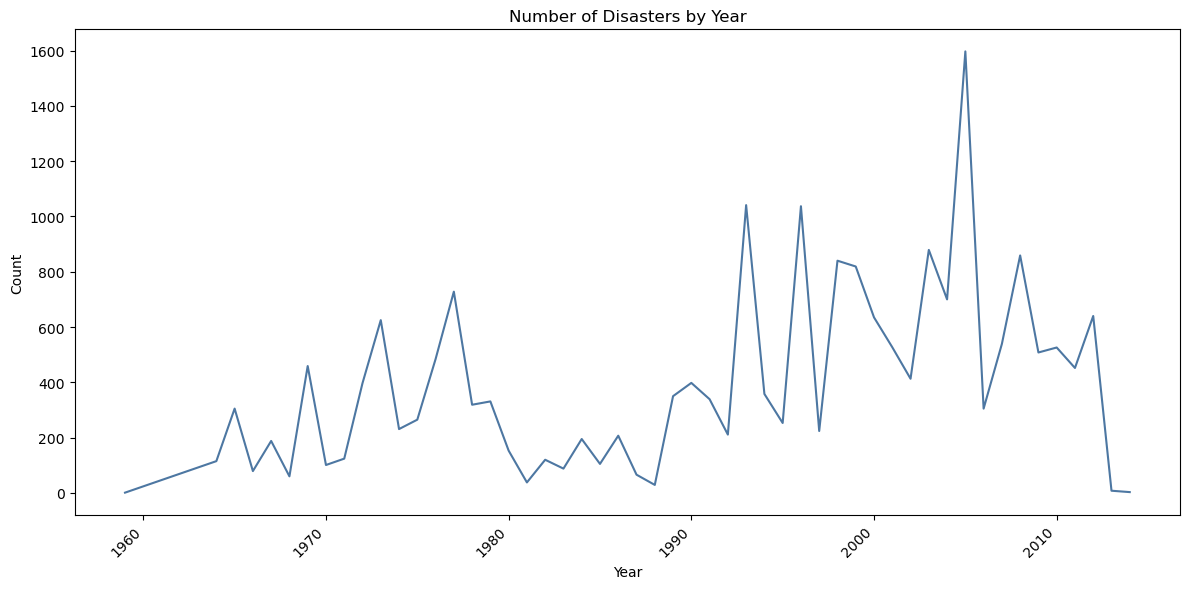

In [121]:
# Make copy to avoid overwriting
bp_cp = df_cleaned.copy()

# Ensure 'Declaration Date' column exists and is in datetime format
bp_cp['Declaration Date'] = pd.to_datetime(bp_cp['Declaration Date'], errors='coerce')
bp_cp['Year'] = bp_cp['Declaration Date'].dt.year

# Drop rows with non-finite values in 'Year' column
bp_cp = bp_cp.dropna(subset=['Year'])

# Convert 'Year' column to integers using recommended method
bp_cp['Year'] = bp_cp['Year'].astype(int)

# Count the number of disasters per year
disaster_counts_by_year = bp_cp['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=disaster_counts_by_year, color='#4D77A2')

plt.title('Number of Disasters by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('number_of_disasters_by_year_lineplot.png')
plt.show()


As it drawn from the graph, the number of disasters fluctuated over time and reach it higest in the 90s. The number of catastrophes in the US decreased significantly after 2010.

The trend would also displayed over each month of a year to have a more sightful time-series analysis 

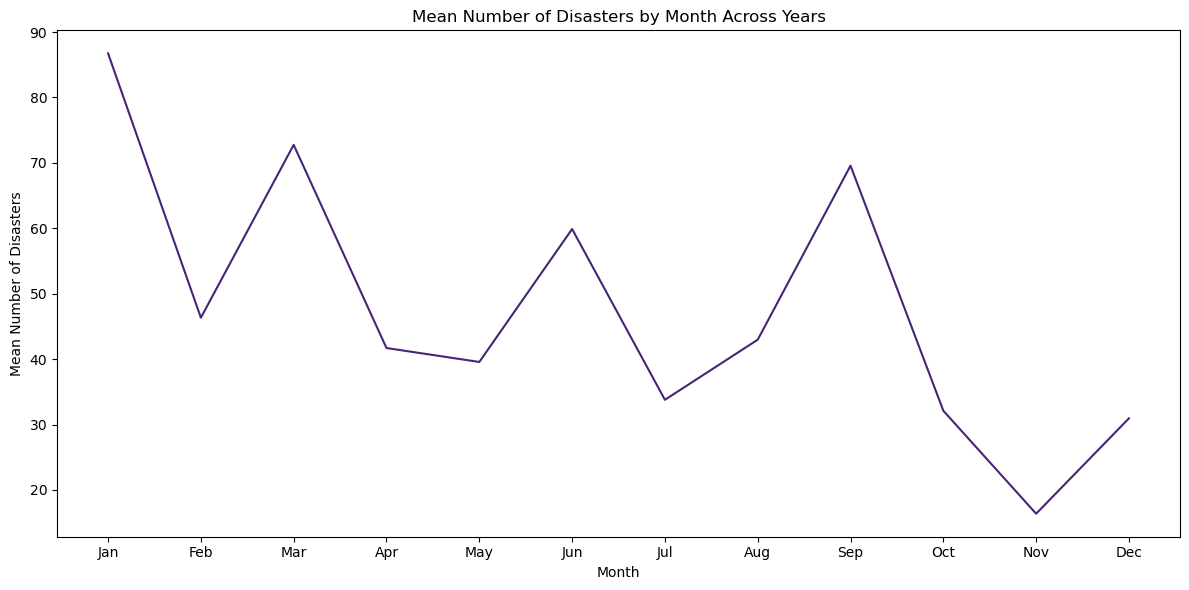

In [123]:
# Ensure 'Declaration Date' column exists and is in datetime format
bp_cp['Declaration Date'] = pd.to_datetime(bp_cp['Declaration Date'], errors='coerce')

# Extract the month and year from 'Declaration Date'
bp_cp['Month'] = bp_cp['Declaration Date'].dt.month
bp_cp['Year'] = bp_cp['Declaration Date'].dt.year

# Calculate the mean number of disasters for each month across all years
mean_disasters_by_month_year = bp_cp.groupby(['Year', 'Month']).size().groupby('Month').mean()

# Plot line graph
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_disasters_by_month_year, color='#482475')

# Add title and labels
plt.title('Mean Number of Disasters by Month Across Years')
plt.xlabel('Month')
plt.ylabel('Mean Number of Disasters')

# Set x-axis ticks and labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show plot
plt.tight_layout()
plt.show()


The number of disasters is moderately high in the first quarter of the year and peak in was September with almost 4000 disasters. However, the number of disasters fell sharply after that since the smallest number of cases recorded was in November. This Analysis can help in the preparation for disasters, including Food Resources, Hospital Emergencies or even Army Force.

A really crucial factor when there is a disaster is the Assistance Program. A line graph would be used to show trends of receiving rates for 4 different programs. First, the data would be prepared by converting Yes/No value to 1 and 0. These values would later be grouped by the years to giving further calculation and analysis.

In [96]:
# Copy to avoid overwriting
ac_cp = df_cleaned.copy()

# Extract 'Year' from 'Declaration Date'
ac_cp['Year'] = pd.to_datetime(ac_cp['Declaration Date'], errors='coerce').dt.year

# Convert "Yes/No" to 1 and 0 for Assistance columns
program_columns = [
    'Individual Assistance Program',
    'Individuals & Households Program',
    'Public Assistance Program',
    'Hazard Mitigation Program'
]
for col in program_columns:
    ac_cp[col] = ac_cp[col].map({'Yes': 1, 'No': 0})

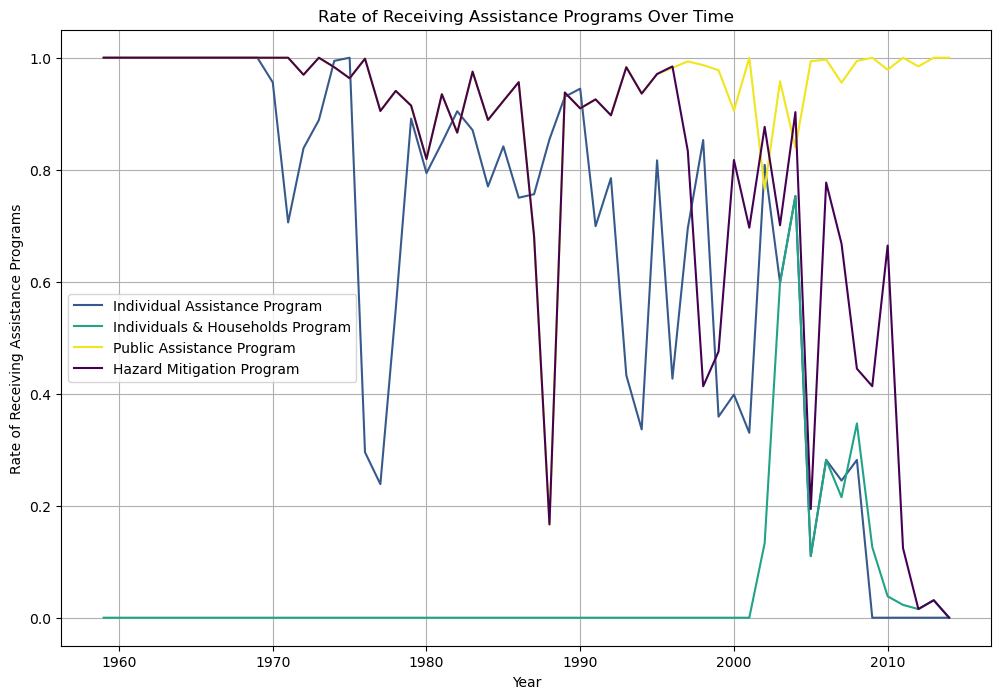

In [112]:
# Specify the program column names
programs = [
    'Individual Assistance Program',
    'Individuals & Households Program',
    'Public Assistance Program',
    'Hazard Mitigation Program'
]

# Group by 'Year' and calculate the mean for each program
grouped_df = ac_cp.groupby(['Year'])[programs].mean().reset_index()
 
# Define plot characters then display
plt.figure(figsize=(12, 8))
colors = ['#375a8c', '#20a386', '#f1e51d', '#440154'] 

for program, color in zip(programs, colors):
    plt.plot(grouped_df['Year'], grouped_df[program], label=program, color=color) 
    
plt.xlabel('Year')
plt.ylabel('Rate of Receiving Assistance Programs')
plt.title('Rate of Receiving Assistance Programs Over Time')
plt.legend()
plt.grid(True)
plt.show()


As it is shown in the graph, the Rating of having Assistance Programs in a plot fluctuates rapidly and frequently. Nevertheless, it is obvious that while the other three showed downward trends and reached almost 0 after 2010, the Public Assistance Program still maintains high percentages over time. Next, a heatmap can show how active these programs were in each month of every year.

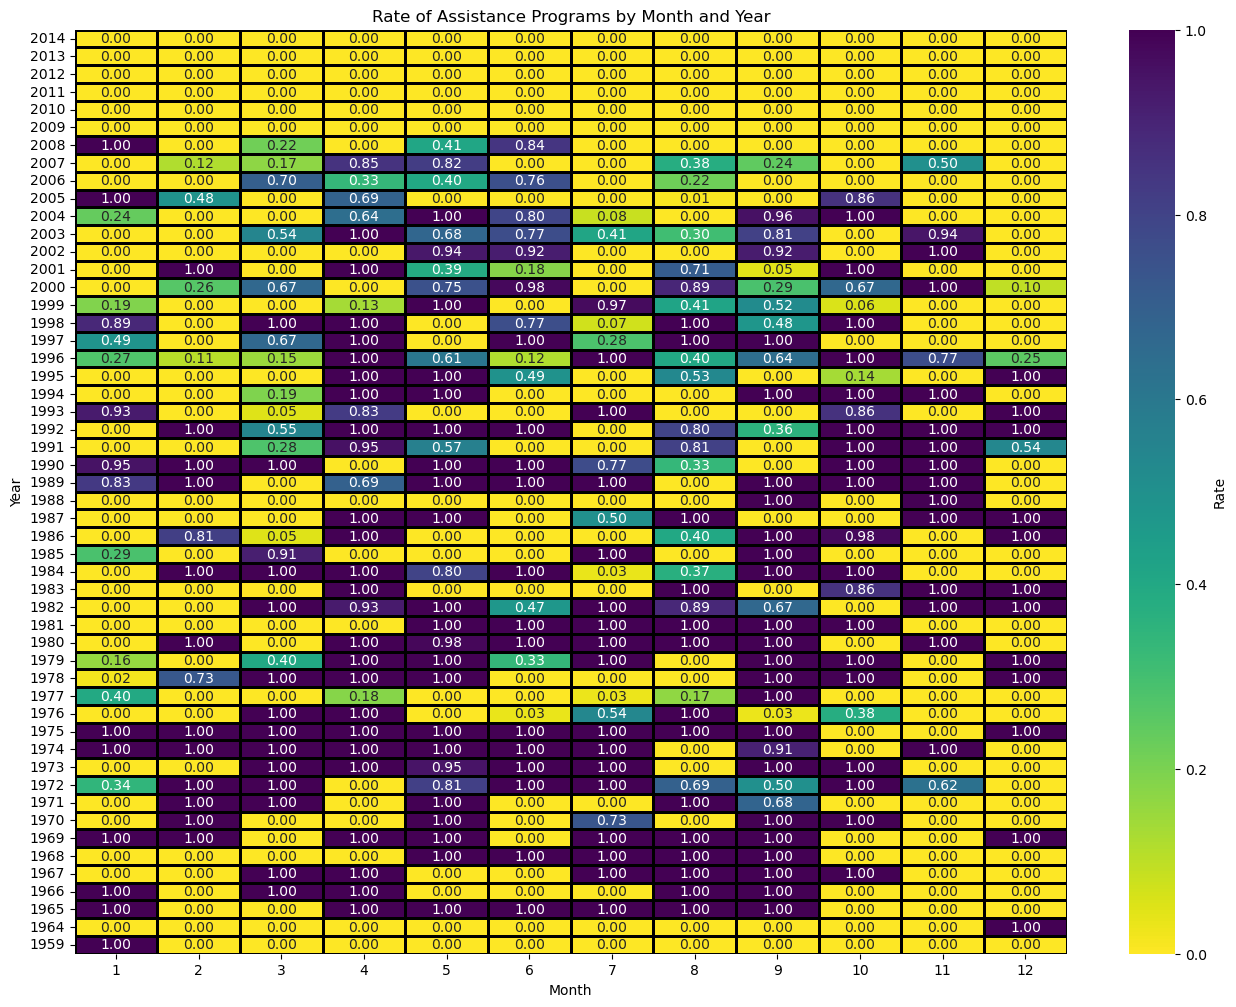

In [142]:
# Create a pivot table. Index: 'Year', columns: 'Month' 
pivot_table = ac_cp.pivot_table(index='Year', columns='Month', values=program_columns[0], aggfunc='mean').fillna(0)

# Convert index years to integers
pivot_table.index = pivot_table.index.astype(int)

# Set sequence of year index
pivot_table = pivot_table.sort_index(ascending=False)

# Custom color palette and cell size
plt.figure(figsize=(16, 12))  # Increase the figure size for larger cells
sns.heatmap(pivot_table, cmap=sns.color_palette("viridis_r", as_cmap=True), annot=True, fmt=".2f", linewidths=1, linecolor='black', cbar_kws={'label': 'Rate'})  # Increased linewidths for better visibility

# Format year labels 
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: int(x)))

# Setting values in middle of cells
plt.xticks(ticks=[i + 0.5 for i in range(12)], labels=[i + 1 for i in range(12)], rotation=0)
plt.yticks(ticks=[i + 0.5 for i in range(len(pivot_table.index))], labels=pivot_table.index, rotation=0)

# Set charecteristics and plot
plt.title('Rate of Assistance Programs by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


Assistance Programs are active the most in the middle of the year, from April to September. This is also the phase that was recorded to have the most disasters (As shown in line graphs above). Besides, in recent years (From 2010), since the number of disasters reached the lowest in 50 years, the Assistance program has also become much less active.  

# 2. Correlation exploration

# 2.1. Type analysis
This section would explore the different types of disasters in the dataset.

At the start, the dataset would be grouped based on the "Disaster Type" attribute to further aggregate the data and record the number for each type.

In [97]:
disaster_numbs = df_cleaned['Disaster Type'].value_counts()

# Create a DataFrame from the crime counts
disaster_numbs_df = pd.DataFrame({'Disaster Type': disaster_numbs.index, 'Case number': disaster_numbs.values})

# Reset the index and drop the old index column
disaster_numbs_df.reset_index(drop=True, inplace=True)
disaster_numbs_df.index += 1

# Display
disaster_numbs_df

,Disaster Type,Case number
1,Storm,10616
2,Flood,7428
3,Hurricane,5636
4,Snow,3156
5,Fire,1966
6,Ice,1521
7,Tornado,1303
8,Drought,1224
9,Winter,300
10,Other,287


As it evident, storm is the most usual types of disasters while there was only one terrorism In the US from 1959-2014.

Since pie chart is able to provide a clear overview, it would be the ultimate option to visualise the distribution of each disaster types.

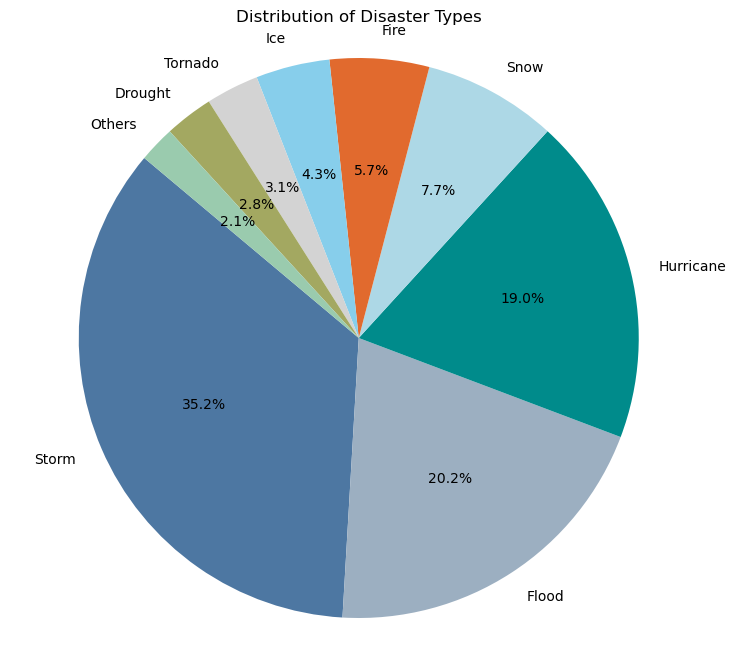

In [138]:
# Counts number disasters of each type
disaster_counts = df['Disaster Type'].value_counts()

# Calculate total occurrences
total_occurrences = disaster_counts.sum()

# Calculate the percentage of each type
disaster_percentages = disaster_counts / total_occurrences * 100

# Filter out and calculate <1.0% occurances
disaster_counts_filtered = disaster_counts[disaster_percentages >= 1.0]
others_count = disaster_counts[disaster_percentages < 1.0].sum() # Set in Others category
disaster_counts_filtered['Others'] = others_count 

# Set colors
disaster_colors = {
    'Fire': '#E16A2E',  
    'Snow': 'lightblue',
    'Flood': '#9CAFC1',
    'Ice': 'skyblue',
    'Storm': '#4D77A2',
    'Drought': '#A3A861',
    'Hurricane': 'darkcyan',
    'Others': '#9ACBAE' 
}

# Plot pie chart 
plt.figure(figsize=(9, 8))
colors = [disaster_colors.get(disaster, 'lightgrey') for disaster in disaster_counts_filtered.index] # Iterate over each disaster type and assign color
plt.pie(disaster_counts_filtered, labels=disaster_counts_filtered.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Disaster Types')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.
plt.savefig('distribution_of_disaster_types_pie.png')
plt.show()


As it is evident from both plots, storm is the most prevalent disaster types, followed by flood, snow and hurricane. These four took about 75 to 80 percent of the Disasters in America, with approximately 26,000 cases. There are still other catastrophes but in comparison with the four, they are much less considerable.

# 2.2 Geographic Analysis

This section would visualize data based on their geography location and give drawn further information on their locational distribution. 

To begin, the folium libraries would be utilised to show an overlay heatmap on a real geographical one to show the distribution of disasters in 50 states of the US. The instructions to use this library can be found at: https://realpython.com/python-folium-web-maps-from-data/. 

To utilised folium, ther are certain data preparation steps. First, since the dataset recorded the State as they code (abbreviations), it is needed to covert these to full name to use the geopy module. After that, it also needed to create an dictionary for the state names. This would take a certain amount of time without the information provided from: https://en.wikipedia.org/wiki/List_of_states_and_territories_of_the_United_States and a little use of Excel to adjust to the right syntax

In [99]:
import pandas as pd
import folium
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap

# Load Federal Disasters dataset
disasters_df = df_cleaned

# Dictionary mapping state abbreviations to full names
state_abbreviations = {
    'GA': 'Georgia',
    'TX': 'Texas',
    'LA': 'Louisiana',
    'MI': 'Michigan',
    'MT': 'Montana',
    'MA': 'Massachusetts',
    'IA': 'Iowa',
    'NH': 'New Hampshire',
    'FL': 'Florida',
    'AK': 'Alaska',
    'MS': 'Mississippi',
    'CA': 'California',
    'NV': 'Nevada',
    'SD': 'South Dakota',
    'WV': 'West Virginia',
    'RI': 'Rhode Island',
    'ME': 'Maine',
    'CT': 'Connecticut',
    'NY': 'New York',
    'NM': 'New Mexico',
    'NC': 'North Carolina',
    'SC': 'South Carolina',
    'IN': 'Indiana',
    'HI': 'Hawaii',
    'CO': 'Colorado',
    'KS': 'Kansas',
    'OK': 'Oklahoma',
    'PA': 'Pennsylvania',
    'NJ': 'New Jersey',
    'OR': 'Oregon',
    'WA': 'Washington',
    'ID': 'Idaho',
    'OH': 'Ohio',
    'PR': 'Puerto Rico',
    'KY': 'Kentucky',
    'VA': 'Virginia',
    'MO': 'Missouri',
    'AR': 'Arkansas',
    'IL': 'Illinois',
    'ND': 'North Dakota',
    'MN': 'Minnesota',
    'NE': 'Nebraska',
    'AL': 'Alabama',
    'DE': 'Delaware',
    'MD': 'Maryland',
    'GU': 'Guam',
    'TN': 'Tennessee',
    'FM': 'Micronesia',
    'WY': 'Wyoming',
    'VT': 'Vermont',
    'VI': 'Virgin Islands',
    'WI': 'Wisconsin',
    'AS': 'American Samoa',
    'AZ': 'Arizona',
    'PW': 'Palau',
    'MP': 'Northern Mariana Islands',
    'UT': 'Utah',
    'MH': 'Marshall Islands',
    'DC': 'District of Columbia'
}

# Convert state abbreviations to full names
disasters_df['State'] = disasters_df['State'].map(state_abbreviations)


After having the state prepared, we plot the heatmap with overlay color layers. To do so, the calculation of intensity in each state will be taken at first. Then identify the center of each state by defining longitude and latitudes. Then convert all the data to the right format for plotting.

In [100]:
# Calculate intensity of disasters for each state
state_intensity = disasters_df.groupby('State').size().reset_index(name='Intensity')

# Identify state centers, using longtitude and latitude
geolocator = Nominatim(user_agent="state_geocoder")
state_centers = {}
for state_name in state_intensity['State']:
    location = geolocator.geocode(state_name)
    if location:
        state_centers[state_name] = (location.latitude, location.longitude)

# Convert state names, latitude, and longitude to heatmap data format
heat_data = []
for state_name, intensity in zip(state_intensity['State'], state_intensity['Intensity']):
    if state_name in state_centers:
        heat_data.append([state_centers[state_name][0], state_centers[state_name][1], intensity])

# Create a Folium map centered around the United States
m = folium.Map(location=[37, -95], zoom_start=4)

# Add heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m


As it visualised, the North West Sea areas (New York, Washington DC and Boston show a strong level of disasters. However, Texas has the most disasters. This what unsurprisided since this state is well-known with record high hurrican and storms.

Further than that, a choropleth map will be displayed to see the intensity of the top 9 disasters in each state. The first step needed is tp import the geopandas library. Brief information and instructions of it can be found at this link: https://geopandas.org/en/stable/. 

Overall, the library is extremely supportive of showing geospatial data. However, plotting a choropleth map also requires the map of the United States, which comes into a shapefile. This might be unfamiliar but in short, it is a kind of conceptual design map that can plot on geographic information. 

The first step is to read in data, which are the original disaster dataset and the Shapefile of America.

In [ ]:
import geopandas as gpd

# Load shapefile
shapefile_path = 'States_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Load disaster data
disasters_df = df_cleaned.copy()

Next, it is needed to merge the data from 2 files into one data frame and utilise it to show the choropleth map of the top 9 disaster types. The States shapefile comes from the following link, free to download: https://hub.arcgis.com/datasets/1b02c87f62d24508970dc1a6df80c98e. The PuBu color theme would be chosen instead of the usual viridis because from a personal view, it is better displayed based on the color chroma (lighter or darker tone). In the map, the borders of states are also set to have a better visualisation.

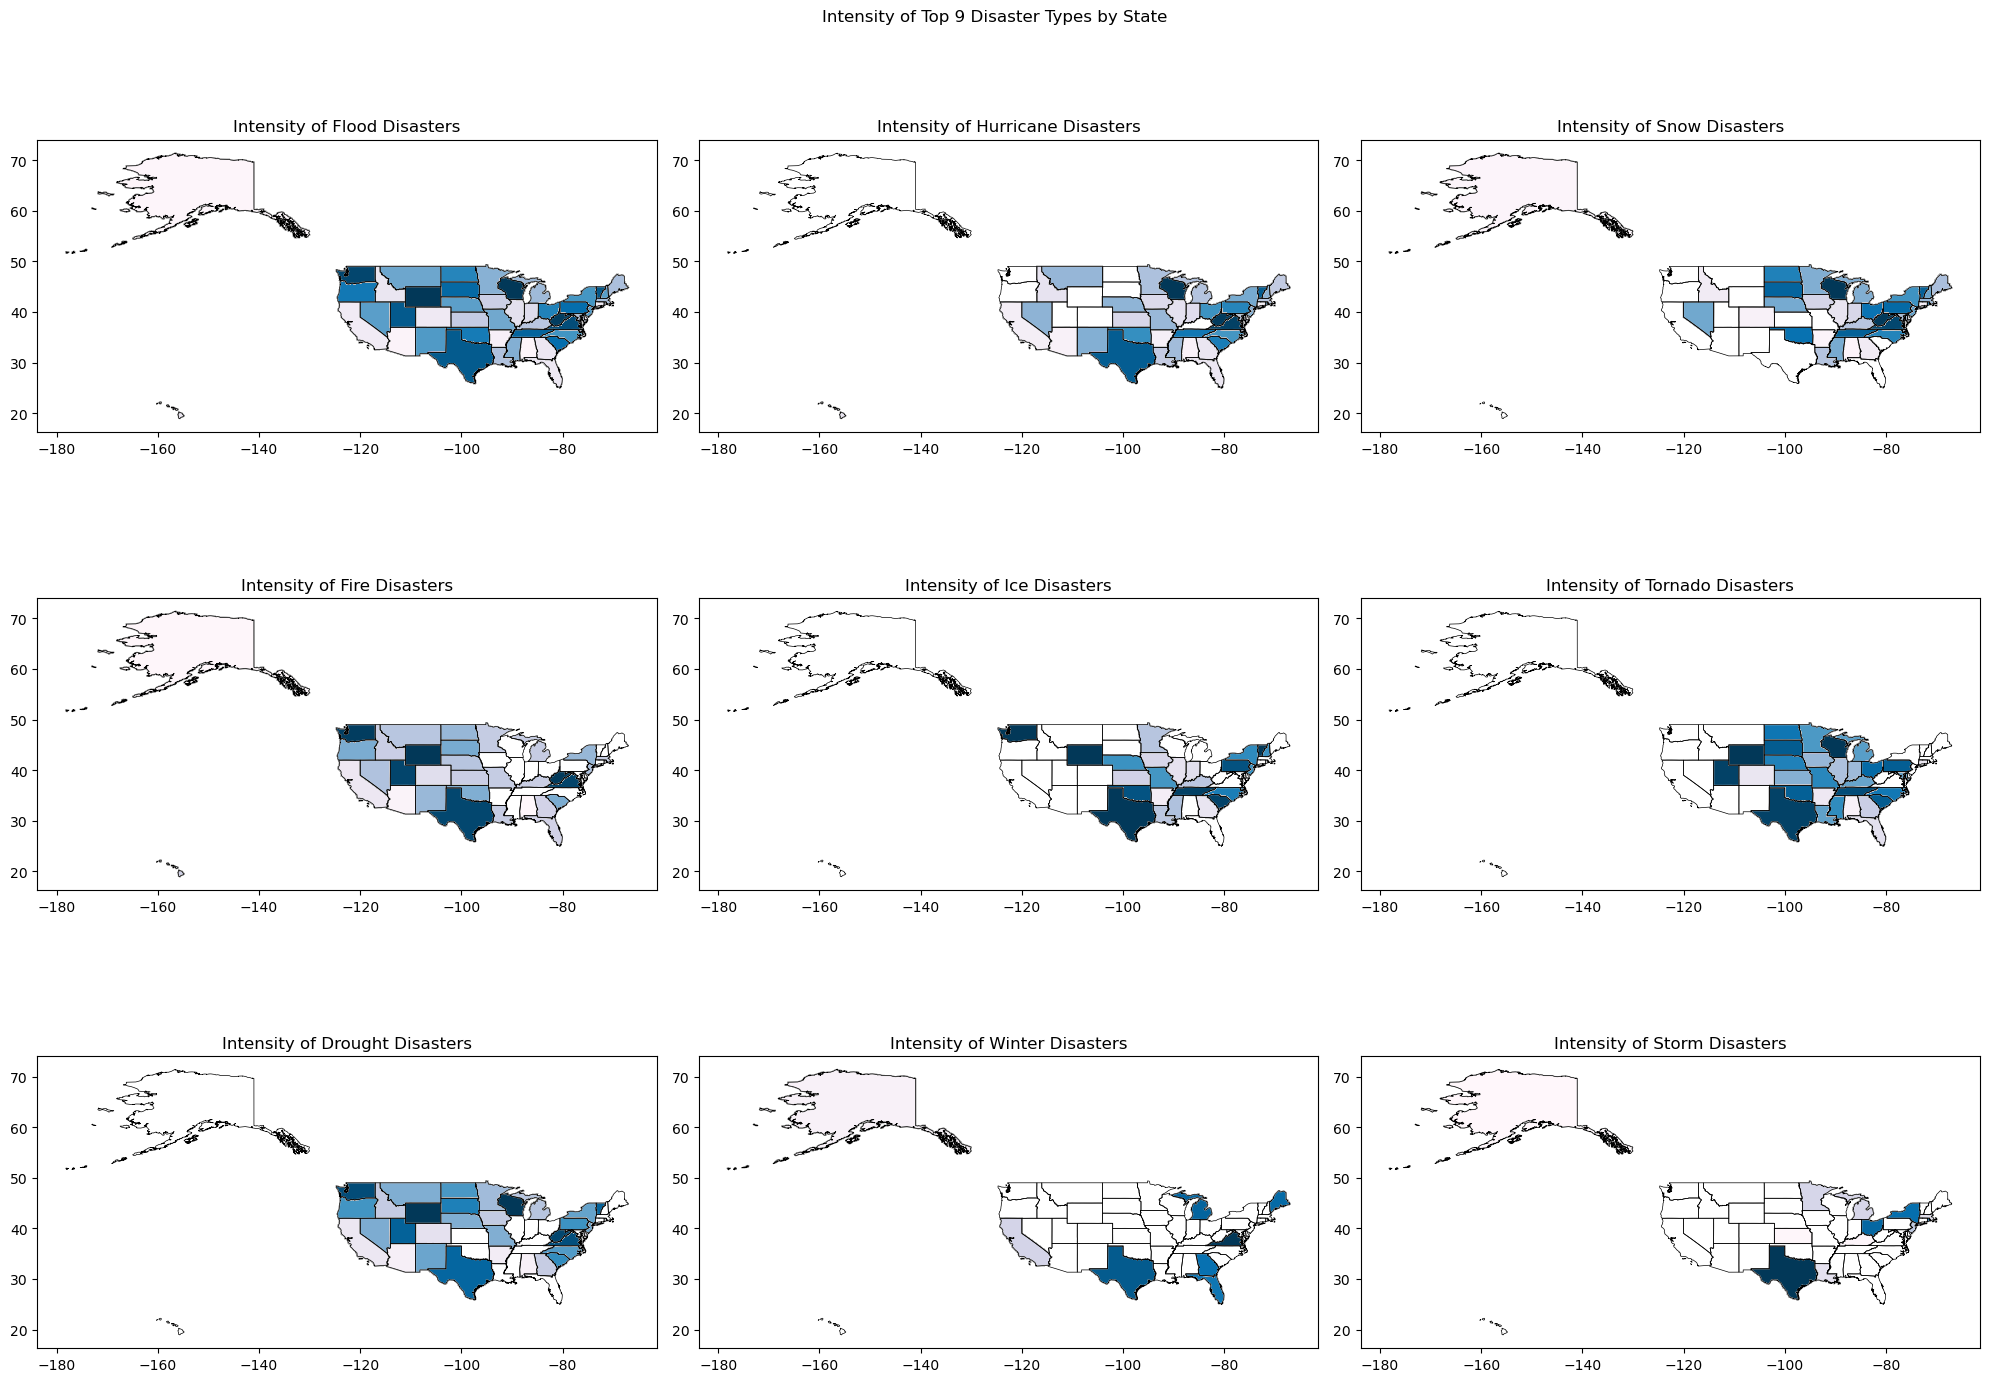

In [147]:
# Calculate top 9 disaster types
top_disasters = disasters_df['Disaster Type'].value_counts().head(10).index
top_disasters = top_disasters[top_disasters != "Storm"]

# Merge the shapefile data with disaster data
merged = gdf.merge(disasters_df, how='left', left_on='State_Code', right_on='State')

# Initialize plot
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Intensity of Top 9 Disaster Types by State')

# Plot state borders in black
for ax in axes.flatten():
    gdf.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Plot each disaster type
for ax, disaster_type in zip(axes.flatten(), top_disasters):
    data = merged[merged['Disaster Type'] == disaster_type]
    data.plot(ax=ax, cmap='PuBu', linewidth=0.8, edgecolor='0.8', legend=True) 
    ax.set_title(f'Intensity of {disaster_type} Disasters')
    ax.set_aspect('equal')  # Equal aspect ratio to prevent distortion

# Set title for storm plot
axes.flatten()[-1].set_title('Intensity of Storm Disasters')

plt.tight_layout()
plt.show()


By utilise the choropleth map, there are noticeable patterns in the occurrence of disaster types uncovered, highlighting the prevalence of specific disasters in particular states. However, across all crime types, there is a clear indication that location significantly influences the frequency of catastrophic incidents. These findings would recommend the distribution of Assisting forces and resources during disaster seasons. 

# Conlusion

In summary, the analysis of the "Federal Disasters" dataset has drawn significant findings regarding disaster types, locations, and distributions over time.

Firstly, there is a notable sharp decrease in the number of disasters in recent decades, particularly after the tough 1990s. On average, about 500 disasters were declared per year, but this number has significantly declined in the last decade. The data reveals a seasonal trend, with most disasters occurring in the middle of the year, specifically from April to September.  

Geographically, Texas emerges as the state with the most disaster declarations, along with several states in the Northwest. Interestingly, winter disasters are predominantly recorded in states along the edges of the country, suggesting a geographical pattern to such events. These finding also indicates a close relationship of Disaster Type, Intesnisity and geography location. 

In terms of assistance programs, there has been a notable decline in their activation, except for the Individual & Households Program, which consistently remains the most active. This trend may indicate a shift in the type or scale of disasters, or changes in federal response strategies.

Overall, these findings highlight important temporal and geographical patterns in disaster declarations, as well as shifts in federal assistance program activations. Understanding these trends is crucial for improving disaster preparedness and response strategies, ensuring resources are allocated effectively to mitigate the impacts of future disasters.